In [ ]:
'''
Documentation: 
Topic: Feature selection
Dataset: https://www.kaggle.com/uciml/autompg-dataset
UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/auto+mpg

Reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection.(f_regression/mutual_info_regression/chi2/mutual_info_classif)

Select the best k features based on statistical tests.

METHODOLOGY
Part 1: 
Read and parse the initial dataset
Load it into our pandas dataframe
Display the dataset with feature information
Part 2: 
Display the feature importance score (numeric and graph).
Select the best five features and display their name.
Part 3:
For regression: f_regression, mutual_info_regression
For classification: chi2, mutual_info_classif - using this here
'''

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from matplotlib import pyplot

In [2]:
# loading the dataset
df=pd.read_csv('auto-mpg.csv') #Reads the csv file
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
uv = df.nunique()
print('Count of unique values in each column :')
print(uv)

Count of unique values in each column :
mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64


In [4]:
df['horsepower']=df['horsepower'].apply(lambda x: np.nan if x=='?' else x)

In [5]:
df.isnull().sum() #6 null values in the horsepower column

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
df['horsepower'] = df['horsepower'].astype(float) #converting object to float
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
#to remove the null values, we can remove it or replace it with mean of the rest of the values.
#we will replace null values with the mean of the non null values in the column
df_mean=df.dropna() #It deletes all rows where NaN is found.
df_mean.info()
#Fill the missing values with mean of the non null values
mean_value_hp=df['horsepower'].mean() #Finds the mean value of the non null values in the horsepower column
df['horsepower']=df['horsepower'].fillna(mean_value_hp) #Replaces NaN values with the output mean
print('\nMean without NaN is:',mean_value_hp)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB

Mean without NaN is: 104.46938775510205


In [8]:
#using label encoder for the car name column
le = preprocessing.LabelEncoder()
df.iloc[:,7:8]=df.iloc[:,7:8].apply(le.fit_transform)
print(df.iloc[:,7:8])

     origin
0         0
1         0
2         0
3         0
4         0
..      ...
393       0
394       1
395       0
396       0
397       0

[398 rows x 1 columns]


In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Feature 0: 0.766175
Feature 1: 2.804759
Feature 2: 1.792105
Feature 3: 1.181366
Feature 4: 1.143311
Feature 5: 0.278578
Feature 6: 0.092091
Feature 7: 1.408333


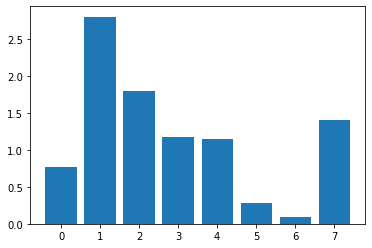

In [10]:
# mutual information gain measure (mutual_info_classif)
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 715.387226
Feature 1: 141.753662
Feature 2: 14952.514135
Feature 3: 3662.213730
Feature 4: 66170.746301
Feature 5: 123.146475
Feature 6: 46.836430
Feature 7: 313.544304


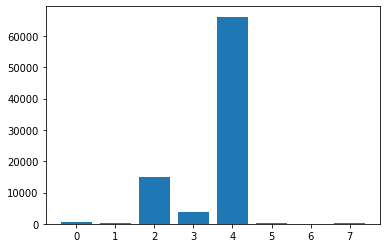

In [11]:
# feature selection - chi2
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=chi2, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 11.010156
Feature 1: 15.711892
Feature 2: 14.321398
Feature 3: 6.661946
Feature 4: 14.316270
Feature 5: 2.134875
Feature 6: 3.438758
Feature 7: inf


C:\Users\goenk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


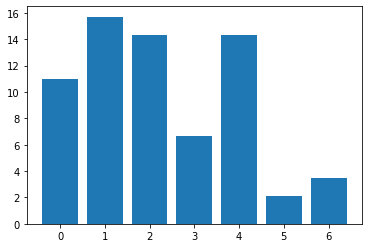

In [12]:
# feature selection - f_classif (ANOVA)
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()
#the feature 7 gives an warning due to 0/0 division leading to 'infinity (inf)'

In [13]:
'''Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.
Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.
In the example below, we use PCA and select 5 principal components.'''

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.97523945e-01 2.06582984e-03 3.65342572e-04 3.23036244e-05
 7.62157735e-06]
[[-7.62505012e-03  1.79002409e-03  1.14255791e-01  3.86112088e-02
   9.92667878e-01 -1.35827045e-03 -1.33508874e-03 -5.47075904e-04]
 [-1.72641224e-02  1.34718432e-02  9.45442364e-01  2.98789267e-01
  -1.20681256e-01 -3.46447341e-02 -2.46929710e-02 -3.19430537e-03]
 [-3.72056127e-02 -7.30146389e-03 -3.04202789e-01  9.48071253e-01
  -2.28451583e-03 -7.33325341e-02 -4.08636740e-02  1.14574474e-02]
 [ 8.30800323e-01 -4.22250584e-03  1.11098748e-02  5.84740873e-02
   3.56778452e-03 -1.63452074e-02  5.52777353e-01  1.91741666e-02]
 [ 5.49744971e-01 -5.74835399e-03 -4.10123336e-03 -6.02009692e-03
   4.03627545e-03  1.28047683e-01 -8.23662748e-01  5.34933552e-02]]
